## The steps involved in performing sentiment analysis:

* **Data Preprocessing**: In this step, we will read the data, remove any unwanted characters, numbers, and special symbols from the tweets, and convert all the text to lowercase.

* **Tokenization**: In this step, we will split the text into words or tokens, which will help us in analyzing the sentiment of each word.

* **Stop Words Removal**: Stop words are the most common words in a language that do not carry any meaning, such as "the", "a", "an", "in", "of", etc. In this step, we will remove stop words from the text.

* **Sentiment Analysis**: In this step, we will use a pre-trained sentiment analysis model to analyze the sentiment of each tweet.

In [1]:
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from textblob import TextBlob

### Reading the csv file

In [6]:
data = pd.read_csv('/kaggle/input/elon-muskcsv/Elon_musk.csv',encoding= 'unicode_escape')

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


### Data Preprocessing

In [8]:

processed_tweets = []
for tweet in data['Text']:
    # Removing unwanted characters, numbers and special symbols
    processed_tweet = re.sub('[^a-zA-Z]', ' ', tweet)
    # Converting text to lowercase
    processed_tweet = processed_tweet.lower()
    processed_tweets.append(processed_tweet)

### Tokenization

In [9]:
tokenized_tweets = []
for tweet in processed_tweets:
    words = word_tokenize(tweet)
    tokenized_tweets.append(words)

### Stop Words Removal

In [10]:
stop_words = set(stopwords.words('english'))
filtered_tweets = []
for tweet in tokenized_tweets:
    filtered_words = []
    for word in tweet:
        if word not in stop_words:
            filtered_words.append(word)
    filtered_tweets.append(filtered_words)

### Sentiment Analysis

In [11]:

sentiments = []
for tweet in filtered_tweets:
    sentiment = TextBlob(' '.join(tweet)).sentiment.polarity
    if sentiment > 0:
        sentiments.append('Positive')
    elif sentiment < 0:
        sentiments.append('Negative')
    else:
        sentiments.append('Neutral')

In [18]:
data['polarity'] = data['Text'].apply(lambda x: TextBlob(x).sentiment.polarity)

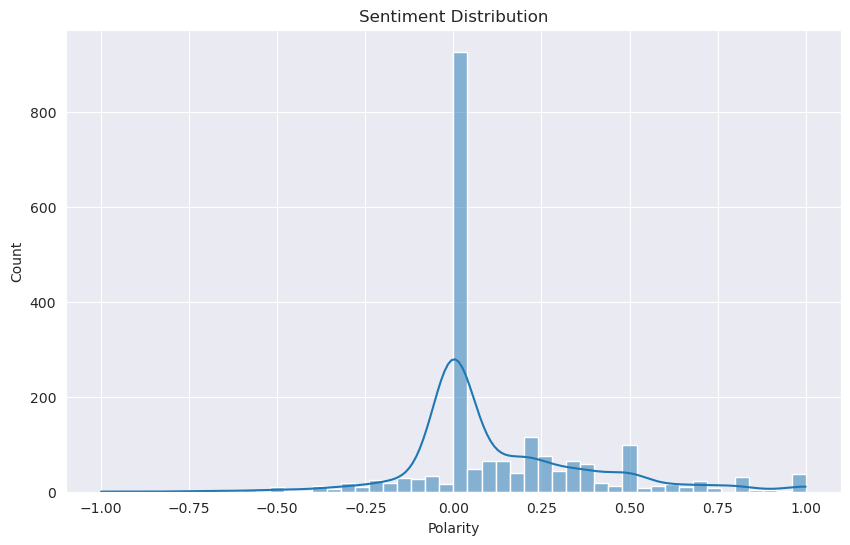

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='polarity', bins=50, kde=True)
plt.title('Sentiment Distribution')
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.show()q

In [35]:

from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
data['sentiment'] = data['Text'].apply(lambda x: sia.polarity_scores(x)['compound'])

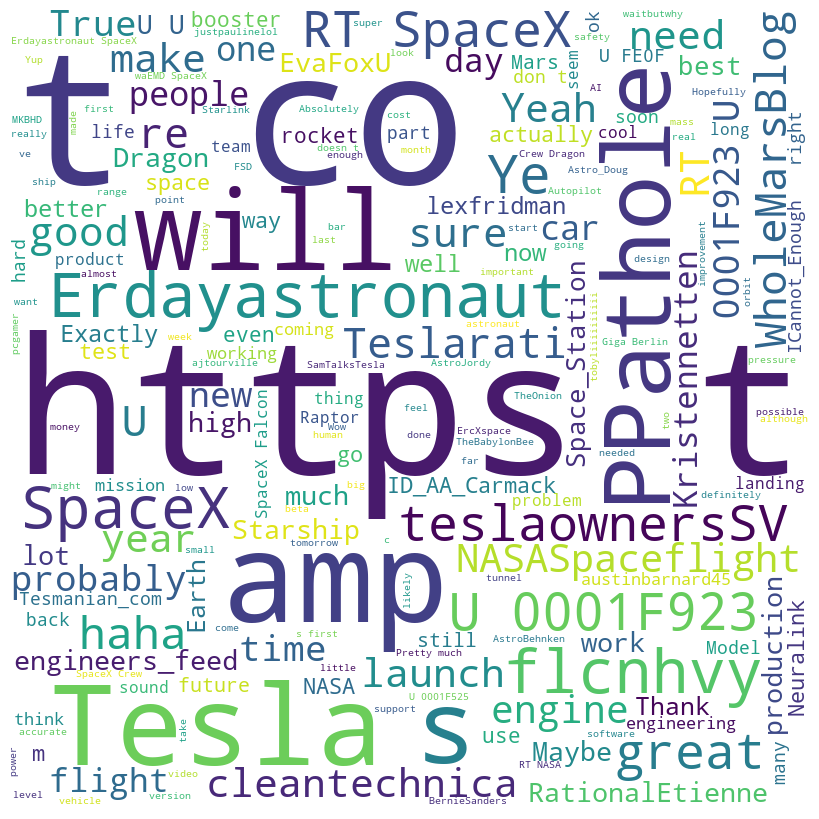

In [36]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(' '.join(data['Text']))
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

### Adding sentiment column to dataframe

In [12]:
data['Sentiment'] = sentiments


# Saving dataframe to csv file

In [13]:
data.to_csv('Elon-musk-sentiment.csv', index=False)

In [15]:
Elon_musk_sentiment_analysis = pd.read_csv("/kaggle/working/Elon-musk-sentiment.csv")
Elon_musk_sentiment_analysis

,Unnamed: 0,Text,Sentiment
0,1,@kunalb11 Im an alien,Negative
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,Neutral
2,3,@joerogan @Spotify Great interview!,Positive
3,4,@gtera27 Doge is underestimated,Neutral
4,5,@teslacn Congratulations Tesla China for amazi...,Positive
...,...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n...",Positive
1995,1996,@PPathole Make sure to read ur terms &amp; con...,Positive
1996,1997,@TeslaGong @PPathole Samwise Gamgee,Neutral
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...,Negative
